# **Spit some [tensor] flow**

Practice makes perfect

`Let's get this over with`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## Let's load the dataset using keras datasets 

In [0]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(353, 10)
(353,)
(89, 10)
(89,)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
N, D = X_train.shape

In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [0]:
i_layer = Input(shape = (D,))
h_layer = Dense(128, activation='relu')(i_layer)
h_layer = Dense(256, activation='relu')(h_layer)
h_layer = Dense(256, activation='relu')(h_layer)
o_layer = Dense(1, activation='relu')(h_layer)
model = Model(i_layer, o_layer)

In [0]:
#custom_opt = tf.keras.optimizers.Adam(0.01)
model.compile(
    optimizer='adam',
    loss='mse')

In [0]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs =300, verbose=False)

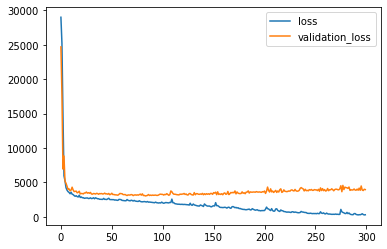

In [53]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()

## Great, the model is overfitting, let's try dropout

In [0]:
i_layer = Input(shape = (D,))
h_layer = Dense(128, activation='relu', kernel_regularizer = l2(0.9))(i_layer)
h_layer = Dense(256, activation='relu', kernel_regularizer = l2(0.9))(h_layer)
h_layer = Dense(256, activation='relu', kernel_regularizer = l2(0.9))(h_layer)
o_layer = Dense(1, activation='relu')(h_layer)
model = Model(i_layer, o_layer)

In [0]:
#custom_opt = tf.keras.optimizers.Adam(0.01)
model.compile(
    optimizer='adam',
    loss='mse')
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, verbose=False)


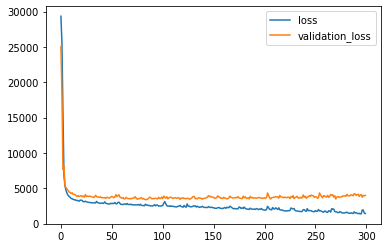

In [56]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()